## Question 2 - Nonlinear Regression

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv("data/regression_part2.csv").sort_values(by=["input", "output"])

In [3]:
df, df.describe()

(    input  output
 11 -4.826 -15.577
 16 -4.616 -15.291
 2  -4.164 -10.016
 22 -3.772  -6.342
 6  -2.879  -5.204
 23 -2.848  -1.673
 18 -2.588  -0.988
 7  -2.276  -1.465
 21 -0.597   0.536
 19  0.992  -1.133
 15  1.345   3.977
 17  1.405  -0.154
 12  2.633  11.382
 8   2.688   8.539
 0   2.728   9.088
 9   2.780   6.929
 13  2.815   9.853
 1   3.244  12.786
 20  3.276  10.743
 4   3.329  10.437
 10  3.874  15.765
 5   4.268  21.681
 24  4.310  25.919
 14  4.441  24.914
 3   4.875  32.976,
            input    output
 count  25.000000  25.00000
 mean    0.817480   5.90728
 std     3.277051  12.43568
 min    -4.826000 -15.57700
 25%    -2.588000  -1.46500
 50%     2.633000   6.92900
 75%     3.276000  11.38200
 max     4.875000  32.97600)

In [4]:
X = df.input.values.reshape(-1, 1)
y_true = df.output.values

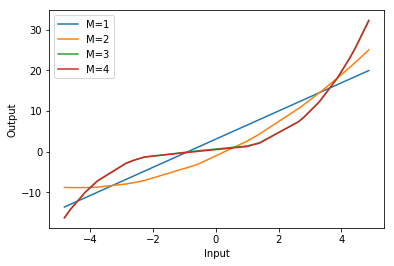

In [40]:
for M in range(1, 5):
    x_M = PolynomialFeatures(M).fit_transform(X)
    lin_reg_model = LinearRegression(fit_intercept=False).fit(x_M, y_true)
    y_pred = lin_reg_model.predict(x_M)
    plt.plot(X, y_pred, label=f"M={M}")
plt.legend(loc="upper-left")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

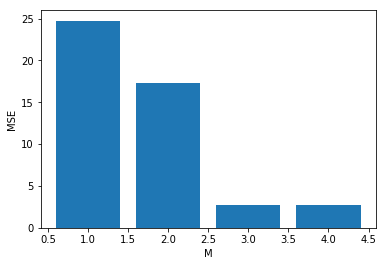

In [6]:
mse_arr = []
for M in range(1, 5):
    x_M = PolynomialFeaturelin_reg_model = LinearRegression(fit_intercept=False).fit(x_M, y_true)
    y_pred = lin_reg_model.predict(x_M)s(M).fit_transform(X)
    
    mse_arr.append(mean_squared_error(y_true, y_pred))
plt.bar(np.arange(1, 5), mse_arr)
plt.xlabel("M")
plt.ylabel("MSE")
plt.show()

For $M=3$ and $M=4$ the models have the same performance. Their fit can be seen in the plot to produce the same outputs, and hence they have the same MSE.

In [49]:
def rbf(x, c, alpha):
    return np.e ** ((-0.5 * ((x-c) ** 2) / alpha ** 2)) 

In [50]:
def transform_rbf(X, alpha):
    c1 = -4.0
    c2 = -2.0
    c3 = 2.0
    c4 = 4.0
    ones = np.ones((X.shape[0], 1))
    transformed = []

    for x in X:
        row = [1, rbf(x, c1, alpha), rbf(x, c2, alpha), rbf(x, c3, alpha), rbf(x, c4, alpha)]
        transformed.append(row)
    
    return np.array(transformed)

In [55]:
def plot_rbf(X):
    alphas = [0.2, 100, 1000]
    for alpha in alphas:
        X_alpha = transform_rbf(X, alpha)
        lin_reg_model = LinearRegression(fit_intercept=False).fit(X_alpha, y_true)
        y_pred = lin_reg_model.predict(X_alpha)
        plt.plot(X, y_pred, label=r"$\alpha=$"+str(alpha))
    plt.legend(loc="upper-left")
    plt.xlabel("Input")
    plt.ylabel("Output (predicted)")
    plt.show()

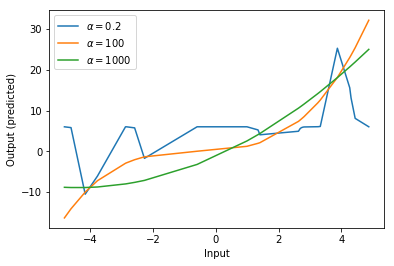

In [56]:
plot_rbf(X)

The graph becomes smoother and more parabolic with larger values of alpha.